<a href="https://colab.research.google.com/github/Saurabh-975/Heart_Disease_Prediction_Using_Deep_Neural_Network/blob/main/Heart_Disease_Prediction_Using_Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
#data management
import pandas as pd
import numpy as np
#model selection
from sklearn.model_selection import train_test_split
#visualization
import seaborn as sns
import matplotlib.pyplot as plt
#ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
#extra
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#load data
db = pd.read_csv('/heart (1).csv')
#we will use copy of our data for visualization and analysis
db_copy = db.copy()

## Exploratory Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#first 5 samples
db.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:

#info
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


As it can be seen we have no null values

In [ ]:
#statistic informations
db.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


We will normalize the data to get more accurate score
Normalizing means fitting our data into 0 and 1
We will talk more  about it later

In [ ]:
#value counts of categorical features
categoricalfeatures = ['ChestPainType', 'RestingECG', 'Sex','ExerciseAngina', 'ST_Slope']
for i in categoricalfeatures:
  print(db[i].value_counts())
  print('**************************')

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
**************************
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
**************************
Sex
M    725
F    193
Name: count, dtype: int64
**************************
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
**************************
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
**************************


## Multivariate Analysis

## MaxHr - Age

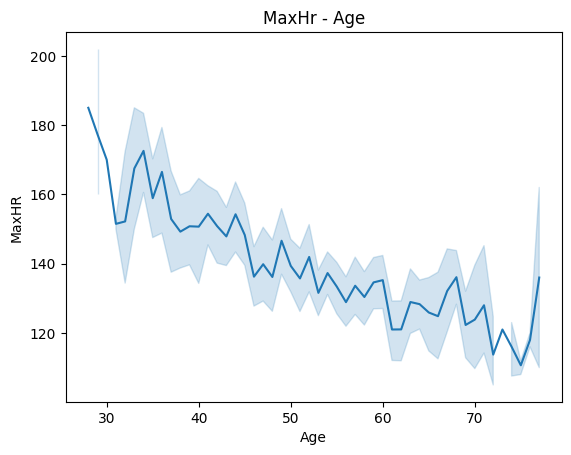

In [ ]:
sns.lineplot(db_copy, x='Age', y='MaxHR')
plt.title('MaxHr - Age')
plt.show()

Which means younger people have more MaxHR rate than older people

## RestingBP - Cholesterol

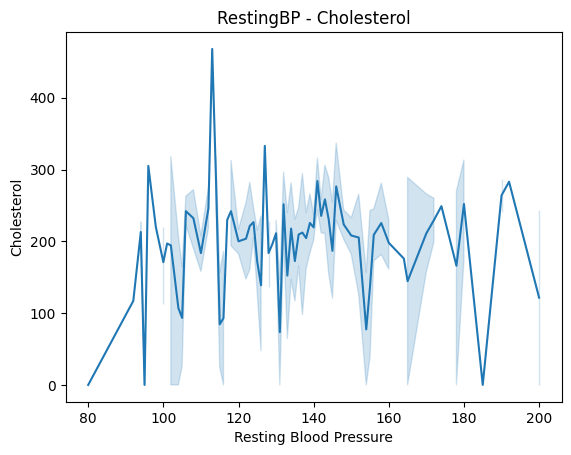

In [ ]:
restingbp = [None if each == 0 else each for each in db_copy['RestingBP']]
sns.lineplot(db_copy, x = restingbp, y = 'Cholesterol')
plt.xlabel('Resting Blood Pressure')
plt.title('RestingBP - Cholesterol')
plt.show()

It seems restingbp has nothing to do with cholestorol

## RestingBP - Age

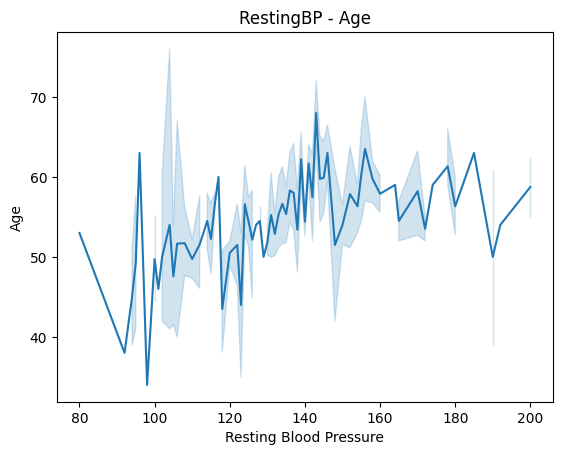

In [ ]:
sns.lineplot(db_copy, x=restingbp, y='Age')
plt.xlabel('Resting Blood Pressure')
plt.title('RestingBP - Age')
plt.show()

It seems that as age increases, resting blood pressure also increases.

## Visualization

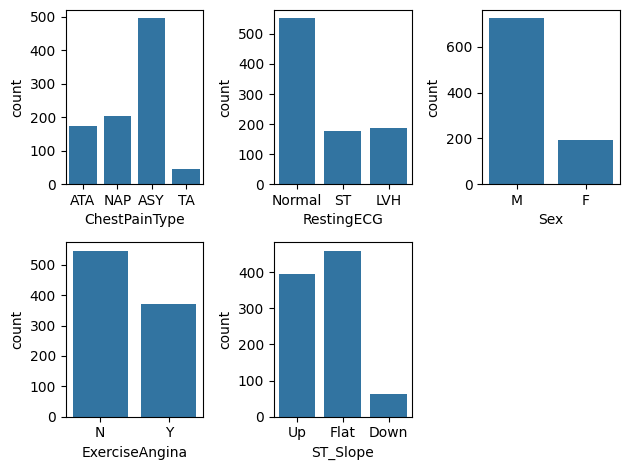

In [ ]:

categoricalfeatures = ['ChestPainType', 'RestingECG', 'Sex', 'ExerciseAngina', 'ST_Slope']
for i in categoricalfeatures:
  ax = plt.subplot(2,3,categoricalfeatures.index(i)+1)
  sns.countplot(x=db_copy[i])
  plt.tight_layout()
plt.show()

As it can be seen number of males is much bigger than number of females

Lets see how much these features effect HeartDisease risk

## The degree to which different categorical features contribute to heat attack risk.

In [ ]:
#Sex
maleHeartDiseaseRate = db_copy[(db_copy['Sex'] == 'M') & (db_copy['HeartDisease'] == 1)].shape[0]/db_copy[db_copy['Sex'] == 'M'].shape[0]
femaleHeartDiseaseRate = db_copy[(db_copy['Sex'] == 'F') & (db_copy['HeartDisease'] == 1)].shape[0]/db_copy[db_copy['Sex'] == 'F'].shape[0]
#chestpaintype
ataChestPainTypeHeartDiseaseRate = db_copy[(db_copy['ChestPainType'] == 'ATA') & (db_copy['HeartDisease'] == 1)].shape[0]/db_copy[db_copy['ChestPainType'] == 'ATA'].shape[0]
napChestPainTypeHeartDiseaseRate = db_copy[(db_copy['ChestPainType'] == 'NAP') & (db_copy['HeartDisease'] == 1)].shape[0]/db_copy[db_copy['ChestPainType'] == 'NAP'].shape[0]
asyChestPainTypeHeartDiseaseRate = db_copy[(db_copy['ChestPainType'] == 'ASY') & (db_copy['HeartDisease'] == 1)].shape[0]/db_copy[db_copy['ChestPainType'] == 'ASY'].shape[0]
taChestPainTypeHeartDiseaseRate = db_copy[(db_copy['ChestPainType'] == 'TA') & (db_copy['HeartDisease'] == 1)].shape[0]/db_copy[db_copy['ChestPainType'] == 'TA'].shape[0]
#restingecg
normalRestingEcgRate = db_copy[(db_copy['RestingECG'] == 'Normal') & (db_copy['HeartDisease'] == 1)].shape[0]/db_copy[db_copy['RestingECG'] == 'Normal'].shape[0]
stRestingEcgRate = db_copy[(db_copy['RestingECG'] == 'ST') & (db_copy['HeartDisease'] == 1)].shape[0]/db_copy[db_copy['RestingECG'] == 'ST'].shape[0]
lvhRestingEcgRate = db_copy[(db_copy['RestingECG'] == 'LVH') & (db_copy['HeartDisease'] == 1)].shape[0]/db_copy[db_copy['RestingECG'] == 'LVH'].shape[0]
#ExerciseAngina
NExerciseAnginaRate = db_copy[(db_copy['ExerciseAngina'] == 'N') & (db_copy['HeartDisease'] == 1)].shape[0]/db_copy[db_copy['ExerciseAngina'] == 'N'].shape[0]
YExerciseAnginaRate = db_copy[(db_copy['ExerciseAngina'] == 'Y') & (db_copy['HeartDisease'] == 1)].shape[0]/db_copy[db_copy['ExerciseAngina'] == 'Y'].shape[0]
#ST_Slope
upStSlopeRate = db_copy[(db_copy['ST_Slope'] == 'Up') & (db_copy['HeartDisease'] == 1)].shape[0]/db_copy[db_copy['ST_Slope'] == 'Up'].shape[0]
flatStSlopeRate = db_copy[(db_copy['ST_Slope'] == 'Flat') & (db_copy['HeartDisease'] == 1)].shape[0]/db_copy[db_copy['ST_Slope'] == 'Flat'].shape[0]
downStSlopeRate = db_copy[(db_copy['ST_Slope'] == 'Down') & (db_copy['HeartDisease'] == 1)].shape[0]/db_copy[db_copy['ST_Slope'] == 'Down'].shape[0]


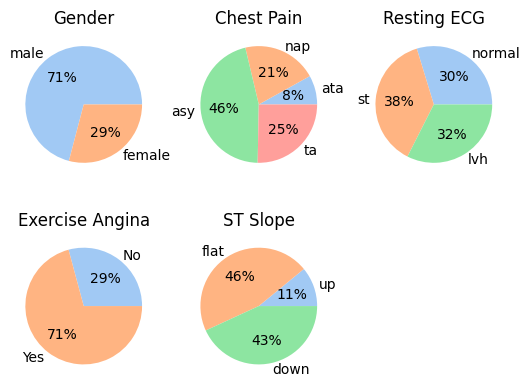

In [ ]:
#Visualization
#rates
genderrate = [maleHeartDiseaseRate, femaleHeartDiseaseRate]
chestpaintyperate = [ataChestPainTypeHeartDiseaseRate, napChestPainTypeHeartDiseaseRate, asyChestPainTypeHeartDiseaseRate, taChestPainTypeHeartDiseaseRate]
restinecgrate = [normalRestingEcgRate,stRestingEcgRate,lvhRestingEcgRate]
exerciseAnginarate = [NExerciseAnginaRate, YExerciseAnginaRate]
stsloperate = [upStSlopeRate,flatStSlopeRate,downStSlopeRate]
rates = [genderrate,chestpaintyperate,restinecgrate,exerciseAnginarate,stsloperate]
#labels
genderlabels = ['male', 'female']
chestpainlabels = ['ata', 'nap', 'asy', 'ta']
restingecglabels = ['normal', 'st', 'lvh']
exerciseAnginalabels = ['No', 'Yes']
stslopelabels = ['up', 'flat', 'down']
labels = [genderlabels,chestpainlabels,restingecglabels,exerciseAnginalabels,stslopelabels]
titles = ['Gender', 'Chest Pain', 'Resting ECG', 'Exercise Angina', 'ST Slope']


for i in range(0, 5):
  plt.subplot(2, 3, i+1)
  plt.title(titles[i])
  plt.pie(rates[i], labels = labels[i], autopct='%.0f%%', colors = sns.color_palette('pastel'))

## The degree to which different continuous features contribute to heart attack risk.

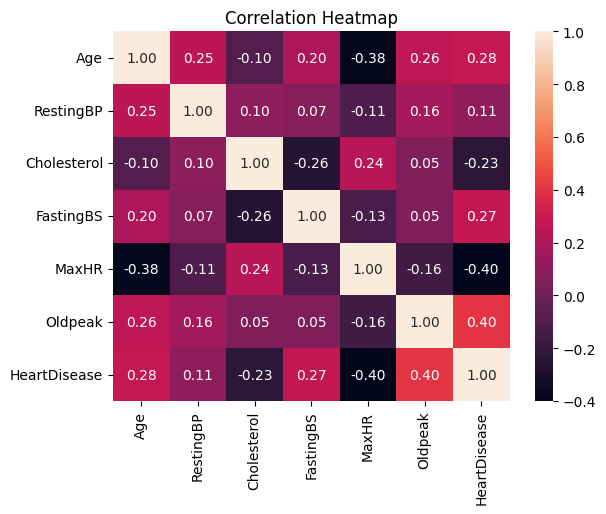

In [ ]:
corrdb = db_copy.loc[:, ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']]
sns.heatmap(corrdb.corr(), fmt = '.2f', annot = True)
plt.title('Correlation Heatmap')
plt.show()

## Visualization of most correlated features

## MaxHR - Age

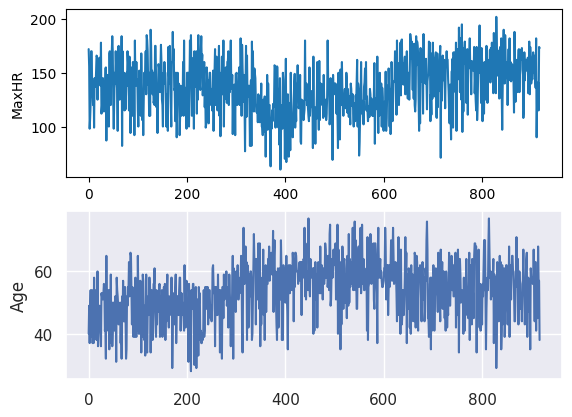

In [ ]:
plt.subplot(2, 1, 1)
sns.set(rc={'figure.figsize':(10, 10)})
sns.lineplot(db_copy['MaxHR'])
plt.subplot(2, 1, 2)
sns.lineplot(db_copy['Age'])
plt.show()

As it can be seen when Age decreases MaxHr increases vice versa

## MaxHR - Cholesterol

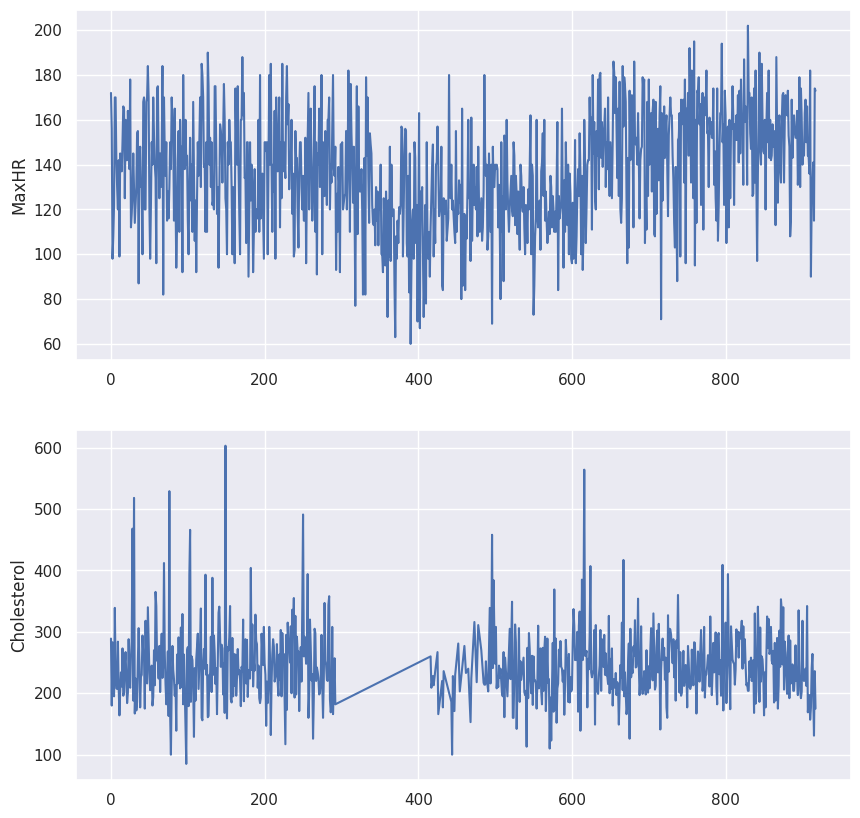

In [ ]:
cholesterol = db_copy[db_copy['Cholesterol'] !=0]['Cholesterol']
plt.subplot(2, 1, 1)
sns.set(rc={'figure.figsize':(10, 5)})
sns.lineplot(db_copy['MaxHR'])
plt.subplot(2, 1, 2)
sns.lineplot(cholesterol)
plt.show()

# Feature Engineering

In [ ]:
#Split data
y_db = db.loc[:, 'HeartDisease']
db.drop('HeartDisease', inplace=True, axis=1)
x_db = db

## Label Encoding

In [ ]:
x_db = pd.get_dummies(x_db , columns = ["ChestPainType","RestingECG","Sex","ExerciseAngina","ST_Slope"],dtype = int)

In [ ]:
x_db

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,0,0,1,0,0,1,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,0,1,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,0,0,0,1,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,0,0,1,0,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,0,0,0,1,0,0,1,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,0,0,0,1,0,0,1,0,1,0,1,0
916,57,130,236,0,174,0.0,0,1,0,0,1,0,0,1,0,1,0,0,1,0


In [ ]:
#corrdb = db_copy.loc[:, ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'Sex_F', 'Sex_M', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']]
#sns.heatmap(corrdb.corr(), fmt = '.2f', annot = True)
#plt.title('Correlation Heatmap')
#plt.show()

## Normalizing

In [ ]:

featurelist = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'Sex_F', 'Sex_M', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']
for i in featurelist:
  mean = x_db[i].mean(axis=0)
  x_db[i] -= mean
  std = x_db[i].std(axis=0)
  x_db[i] /= std


In [ ]:


#our new database
x_db

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.432359,0.410685,0.824621,-0.551041,1.382175,-0.831979,-1.083547,2.074046,-0.532547,-0.229554,-0.507202,0.813831,-0.490182,-0.515671,0.515671,0.823108,-0.823108,-0.2713,-1.001635,1.150047
1,-0.478223,1.490940,-0.171867,-0.551041,0.753746,0.105606,-1.083547,-0.481624,1.875721,-0.229554,-0.507202,0.813831,-0.490182,1.937107,-1.937107,0.823108,-0.823108,-0.2713,0.997280,-0.868582
2,-1.750404,-0.129442,0.769768,-0.551041,-1.524307,-0.831979,-1.083547,2.074046,-0.532547,-0.229554,-0.507202,-1.227418,2.037836,-0.515671,0.515671,0.823108,-0.823108,-0.2713,-1.001635,1.150047
3,-0.584238,0.302660,0.138964,-0.551041,-1.131539,0.574398,0.921889,-0.481624,-0.532547,-0.229554,-0.507202,0.813831,-0.490182,1.937107,-1.937107,-1.213585,1.213585,-0.2713,0.997280,-0.868582
4,0.051853,0.950812,-0.034736,-0.551041,-0.581664,-0.831979,-1.083547,-0.481624,1.875721,-0.229554,-0.507202,0.813831,-0.490182,-0.515671,0.515671,0.823108,-0.823108,-0.2713,-1.001635,1.150047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902283,-1.209697,0.596068,-0.551041,-0.188897,0.293123,-1.083547,-0.481624,-0.532547,4.351537,-0.507202,0.813831,-0.490182,-0.515671,0.515671,0.823108,-0.823108,-0.2713,0.997280,-0.868582
914,1.536064,0.626736,-0.053020,1.812770,0.164595,2.355810,0.921889,-0.481624,-0.532547,-0.229554,-0.507202,0.813831,-0.490182,-0.515671,0.515671,0.823108,-0.823108,-0.2713,0.997280,-0.868582
915,0.369898,-0.129442,-0.619830,-0.551041,-0.856602,0.293123,0.921889,-0.481624,-0.532547,-0.229554,-0.507202,0.813831,-0.490182,-0.515671,0.515671,-1.213585,1.213585,-0.2713,0.997280,-0.868582
916,0.369898,-0.129442,0.340090,-0.551041,1.460728,-0.831979,-1.083547,2.074046,-0.532547,-0.229554,1.969454,-1.227418,-0.490182,1.937107,-1.937107,0.823108,-0.823108,-0.2713,0.997280,-0.868582


# Prediction

## Prediction  with supervised learning algorithms

In [ ]:
#train-test split
x_train, x_test, y_train, y_test = train_test_split(x_db, y_db,test_size=0.35, random_state=42, stratify=y_db)

In [ ]:
# ML Algorithms
models = {
    'Logistic Regression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

# Metrics for each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    if y_proba is not None:
        auc = roc_auc_score(y_test, y_proba)
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        print("AUC:", auc)
        specificity = confusion_matrix(y_test, y_pred)[0,0] / sum(confusion_matrix(y_test, y_pred)[0])
        print("Specificity:", specificity)


Model: Logistic Regression
Accuracy: 0.8819875776397516
Confusion Matrix:
 [[121  23]
 [ 15 163]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       144
           1       0.88      0.92      0.90       178

    accuracy                           0.88       322
   macro avg       0.88      0.88      0.88       322
weighted avg       0.88      0.88      0.88       322

AUC: 0.9315699126092385
Specificity: 0.8402777777777778

Model: GaussianNB
Accuracy: 0.8726708074534162
Confusion Matrix:
 [[123  21]
 [ 20 158]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       144
           1       0.88      0.89      0.89       178

    accuracy                           0.87       322
   macro avg       0.87      0.87      0.87       322
weighted avg       0.87      0.87      0.87       322

AUC: 0.9131554307116105
Specificity: 0.85416666666666

Actually these scores are going to decrease when working with real data

# Prediction with artifical neural nerworks

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define the model
model = Sequential()
model.add(Input(shape=(20,)))  # 20 input features

# First Hidden Layer
model.add(Dense(units=128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Second Hidden Layer
model.add(Dense(units=48, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Third Hidden Layer
model.add(Dense(units=16))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(units=2, activation="softmax"))

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model
our_model = model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    shuffle=True,
    verbose=2,
    validation_data=(x_test, y_test)
)



Epoch 1/300
19/19 - 3s - 172ms/step - accuracy: 0.5554 - loss: 0.8412 - val_accuracy: 0.5932 - val_loss: 0.7447
Epoch 2/300
19/19 - 0s - 7ms/step - accuracy: 0.5940 - loss: 0.7737 - val_accuracy: 0.6677 - val_loss: 0.7283
Epoch 3/300
19/19 - 0s - 9ms/step - accuracy: 0.6292 - loss: 0.7281 - val_accuracy: 0.7019 - val_loss: 0.7094
Epoch 4/300
19/19 - 0s - 15ms/step - accuracy: 0.6074 - loss: 0.7449 - val_accuracy: 0.7267 - val_loss: 0.6872
Epoch 5/300
19/19 - 0s - 16ms/step - accuracy: 0.6342 - loss: 0.7286 - val_accuracy: 0.7516 - val_loss: 0.6670
Epoch 6/300
19/19 - 0s - 8ms/step - accuracy: 0.6594 - loss: 0.6913 - val_accuracy: 0.7640 - val_loss: 0.6455
Epoch 7/300
19/19 - 0s - 17ms/step - accuracy: 0.6141 - loss: 0.7102 - val_accuracy: 0.7981 - val_loss: 0.6258
Epoch 8/300
19/19 - 0s - 14ms/step - accuracy: 0.6997 - loss: 0.6449 - val_accuracy: 0.7981 - val_loss: 0.6091
Epoch 9/300
19/19 - 0s - 8ms/step - accuracy: 0.7013 - loss: 0.6437 - val_accuracy: 0.8199 - val_loss: 0.5924
Epoc

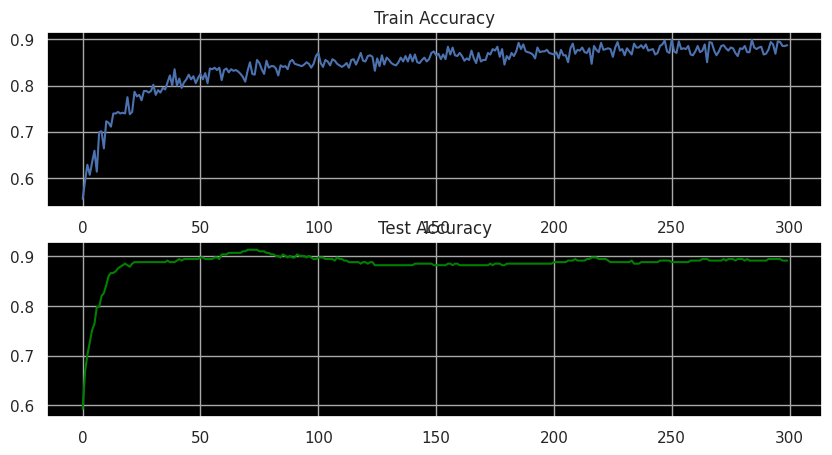

In [ ]:
train_acc = our_model.history['accuracy']
test_acc = our_model.history['val_accuracy']

#first plot
plt.subplot(2,1,1)
plt.title("Train Accuracy")
plt.plot(train_acc)
ax1 = plt.gca()
ax1.set_facecolor('black')
ax1.grid(True , color="#A9A9A9")
#second plot
plt.subplot(2,1,2)
plt.title("Test Accuracy")
plt.plot(test_acc,color="green")
ax2 = plt.gca()
ax2.set_facecolor('black')
ax2.grid(True , color="#A9A9A9")

In [ ]:
# Evaluate ANN
pred_ann = model.predict(x_test)
y_pred_ann = np.argmax(pred_ann, axis=1)
print("\nANN Model")
print("Accuracy:", accuracy_score(y_test, y_pred_ann))
print("Classification Report:\n", classification_report(y_test, y_pred_ann))
y_proba_ann = pred_ann[:,1]
auc_ann = roc_auc_score(y_test, y_proba_ann)
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_proba_ann)
print("AUC:", auc_ann)
specificity_ann = confusion_matrix(y_test, y_pred_ann)[0,0] / sum(confusion_matrix(y_test, y_pred_ann)[0])
print("Specificity:", specificity_ann)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

ANN Model
Accuracy: 0.8913043478260869
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88       144
           1       0.89      0.92      0.90       178

    accuracy                           0.89       322
   macro avg       0.89      0.89      0.89       322
weighted avg       0.89      0.89      0.89       322

AUC: 0.9383192883895131
Specificity: 0.8541666666666666


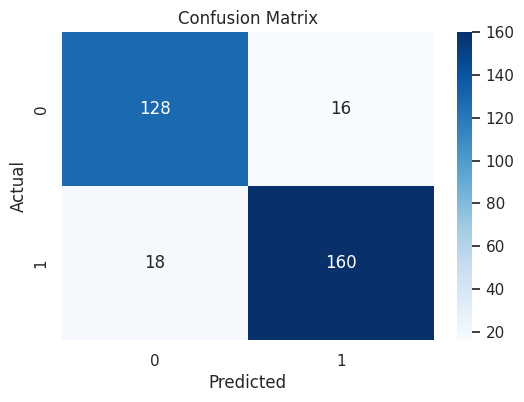

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns

# Predict probabilities and labels
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_probs[:,1])
specificity = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])

print(f"Accuracy: {accuracy:.4f}")
print(f"Misclassification Rate: {misclassification_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.8913
Misclassification Rate: 0.1087
Precision: 0.8865
Recall (Sensitivity): 0.9213
Specificity: 0.8889
F1 Score: 0.9036
AUC Score: 0.9383


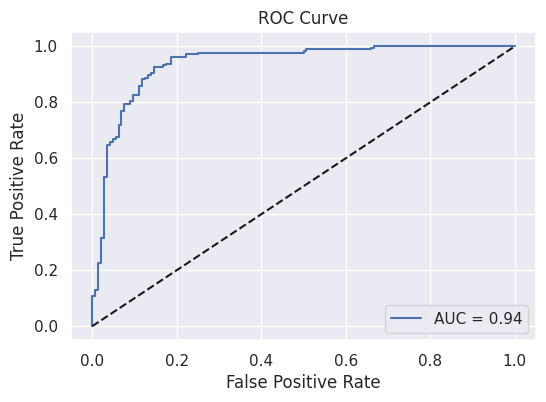

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

## Thank You